# Part II - Getting to know the Borrower's who request for Loans from Prosper      Loan Data
## by Onyeka

## Investigation Overview

> As indicated by the tittle of the presentation, the goal is to get familiar with the borrowers requesting for loan. For instance getting to know the income range of the borrowers so as to know if the they can afford to payback the loan with the required interest. Also to Know the borrowers that requested for high amount of loan.

> From the exploratory analysis done, we can observe that majority of the borrowers with high income range have their loan statuses as being current, meaning their loans are fully paid to date according to their contract. 10732 borrowers with income range of \\$100,000+ have fully paid their loan up to date according to the contract. 9915 borrowers with income range of \\$75,000-99,999, 17012 borrowers with income range of \\$50,000-74,999 and 14309 borrowers with income range of \\$25,000-49,999 all have their loan statuses has being current. Also, majority of the borrowers are being honest about their income range, especially those that have a very high income range between \\$25,000 to \\$100,000+. Many of the borrowers that are not employed and those that have their income range as \\$0 are not being honest and some of them requested for a loan of over \\$15000 which is quite unfair.


> we can also observe from the exploratory analysis, on the average, most borrowers who requested for a loan above \\$10,000 all have an income range of \\$100,000+ which means they are capable of paying back the loan with the required interest. While those that requested for the lowest amount of loan on the average have their income range not displayed. Those that were not employed also requested for a lesser amount of loan which is logical if not, they may not be able to pay back the loan. 


## Dataset Overview

> The Loan Data from Prosper contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. After the preliminary wrangling where nan values and duplicated rows were removed the new prosper loan dataset now contained 109,537 loans (rows) with 16 variables on each loan. The the variable on each loan was reduced from 81  to 16 because, these 16 variables in the dataset are of interest to me in my data analysis exploration.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
prosper_loan = pd.read_csv('prosperLoanData.csv')
# select the column of interest in the prosper loan dataframe
new_prosper_loan = prosper_loan[['ListingKey','Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'ListingCategory (numeric)', 'Occupation', 'EmploymentStatus', 'IsBorrowerHomeowner', 'IncomeRange', 'StatedMonthlyIncome', 'IncomeVerifiable', 'LoanOriginalAmount', 'MonthlyLoanPayment', 'Investors' ]]
new_prosper_loan.head()

,ListingKey,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ListingCategory (numeric),Occupation,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,StatedMonthlyIncome,IncomeVerifiable,LoanOriginalAmount,MonthlyLoanPayment,Investors
0,1021339766868145413AB3B,36,Completed,0.16516,0.1580,0.1380,0,Other,Self-employed,True,"$25,000-49,999",3083.333333,True,9425,330.43,258
1,10273602499503308B223C1,36,Current,0.12016,0.0920,0.0820,2,Professional,Employed,False,"$50,000-74,999",6125.000000,True,10000,318.93,1
2,0EE9337825851032864889A,36,Completed,0.28269,0.2750,0.2400,0,Other,Not available,False,Not displayed,2083.333333,True,3001,123.32,41
3,0EF5356002482715299901A,36,Current,0.12528,0.0974,0.0874,16,Skilled Labor,Employed,True,"$25,000-49,999",2875.000000,True,10000,321.45,158
4,0F023589499656230C5E3E2,36,Current,0.24614,0.2085,0.1985,2,Executive,Employed,True,"$100,000+",9583.333333,True,15000,563.97,20


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

> How true is the income range of the borrowers? more or less who is more honest amongst the borrowers based on their income range?

> Majority of the borrowers are being honest about their income range, especially those that have a very high income range between \\$25,000 to \\$100,000+. Majority of the borrowers that are not employed and those that have their income range as \\$0 are not being honest and some of them requested for a loan of over \\$15000 which is quite unfair.


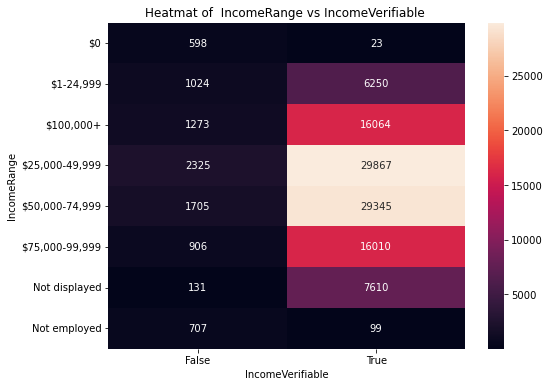

In [3]:
income_counts = new_prosper_loan.groupby(['IncomeRange', 'IncomeVerifiable']).size()
income_counts = income_counts.reset_index(name='count')
income_counts = income_counts.pivot(index = 'IncomeRange', columns = 'IncomeVerifiable', values = 'count')
plt.figure(figsize = [8, 6])
sb.heatmap(income_counts, annot = True, fmt = 'd');
plt.title(f"Heatmat of  IncomeRange vs IncomeVerifiable ");

## (Visualization 2)

> Does the income range of the borrower influence the amount of loan he/she is requesting for?

> From the box plot below, on the average most borrowers who requested for a loan above \\$10,000 all have an income range of \\$100,000+ which means they are capable of paying back the loan with the required interest. While those that requested for the lowest amount of loan on the average have their income range not displayed. Those that were not employed also requested for a less amount of loan which is logical if not, they may not be able to pay back the loan.

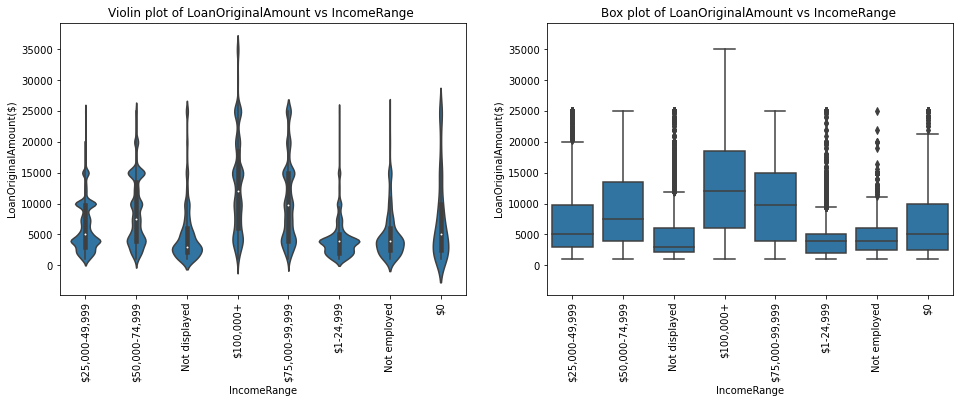

In [4]:
# A violin and a box plot
plt.figure(figsize = [16, 5])
base_color = sb.color_palette()[0]
# LEFT plot: violin plot
plt.subplot(1, 2, 1)
#Let's return the axes object
ax1 = sb.violinplot(data=new_prosper_loan, x='IncomeRange', y='LoanOriginalAmount', color=base_color)
plt.ylabel('LoanOriginalAmount($)')
plt.title(f"Violin plot of LoanOriginalAmount vs IncomeRange ");
plt.xticks(rotation=90);

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data=new_prosper_loan, x='IncomeRange', y='LoanOriginalAmount', color=base_color)
plt.ylabel('LoanOriginalAmount($)')
plt.title(f"Box plot of LoanOriginalAmount vs IncomeRange ");
plt.xticks(rotation=90);
plt.ylim(ax1.get_ylim()); # set y-axis limits to be same as left plot

## (Visualization 3)

> What are the loan statuses of borrowers with high income range ?

> we can observe from the heatmap below that majority of the borrowers with high income range have their loan statuses as being current, meaning their loans are fully paid to date according to their contract. 10732 borrowers with income range of \\$100,000+ have fully paid their loan up to date according to the contract. 9915 borrowers with income range of \\$75,000-99,999, 17012 borrowers with income range of \\$50,000-74,999 and 14309 borrowers with income range of \\$25,000-49,999 all have their loan statuses has being current.

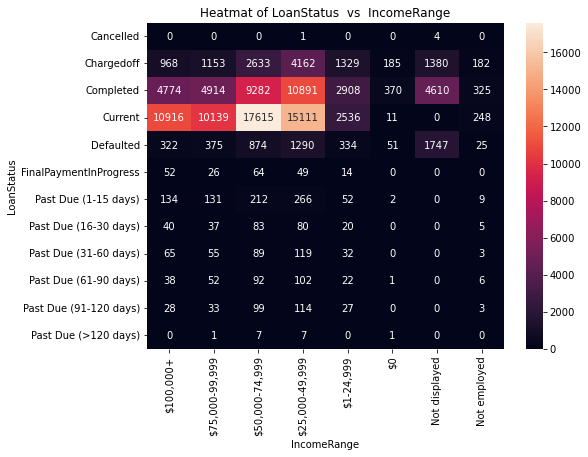

In [5]:
# value count of borrowers LoanStatus
LoanStatus_counts = new_prosper_loan['LoanStatus'].value_counts()

# Convert the income range into ordered categorical datatype
income_ranges = [ '$100,000+', '$75,000-99,999', '$50,000-74,999', '$25,000-49,999', '$1-24,999', '$0', 'Not displayed', 'Not employed']
income = pd.api.types.CategoricalDtype(ordered=True, categories=income_ranges)
new_prosper_loan['IncomeRange'] = new_prosper_loan['IncomeRange'].astype(income);

# Create a heatmap function                                            
def histogram(var_counts, col1 , col2 ):
    var_counts = new_prosper_loan.groupby([col1, col2]).size()
    var_counts = var_counts.reset_index(name='count')
    var_counts = var_counts.pivot(index = col1, columns = col2, values = 'count')
    plt.figure(figsize = [8, 6])
    sb.heatmap(var_counts, annot = True, fmt = 'd');
    plt.title(f"Heatmat of {col1}  vs  {col2}");

histogram(LoanStatus_counts, 'LoanStatus' , 'IncomeRange' )

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_explanatory.ipynb --to slides --post serve --no-input --no-prompt